

---

**Importing Required Libraries and Mounting Google Drive for Image Processing**

In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the images folder
images_folder_path = '/content/drive/My Drive/Images'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Counting the Number of Images in the Folder
python**

In [ ]:
# Count images in the folder
image_files = os.listdir(images_folder_path)
print(f"Total images: {len(image_files)}")


Total images: 1560


In [ ]:
import os
import numpy as np
from tqdm import tqdm
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import Model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout


In [ ]:
image_path = '/content/drive/My Drive/Images'
mask_path = '/content/drive/My Drive/Images'
SIZE = 128

In [ ]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image
import cv2 as cv

# Replace 'image_path' and 'mask_path' with your actual paths
image_path = '/content/drive/My Drive/Images'
mask_path = '/content/drive/My Drive/Images'
SIZE = 256  # Example size, adjust as needed

# Get sorted file names
image_names = sorted(next(os.walk(image_path))[-1])
mask_names = sorted(next(os.walk(mask_path))[-1])

# Initialize arrays
images = np.zeros(shape=(len(image_names), SIZE, SIZE, 3))
masks = np.zeros(shape=(len(mask_names), SIZE, SIZE, 1))

# Load images
for id in tqdm(range(len(image_names)), desc="Images"):
    path = os.path.join(image_path, image_names[id])  # Correct path construction
    img = np.asarray(Image.open(path)).astype('float') / 255.
    img = cv.resize(img, (SIZE, SIZE), cv.INTER_AREA)
    images[id] = img

# Load masks
for id in tqdm(range(len(mask_names)), desc="Masks"):
    path = os.path.join(mask_path, mask_names[id])  # Correct path construction
    mask = np.asarray(Image.open(path)).astype('float') / 255.
    mask = cv.resize(mask, (SIZE, SIZE), cv.INTER_AREA)
    masks[id] = mask[:, :, :1]  # Ensure correct dimension for masks


Masks: 100%|██████████| 1560/1560 [00:42<00:00, 36.37it/s]


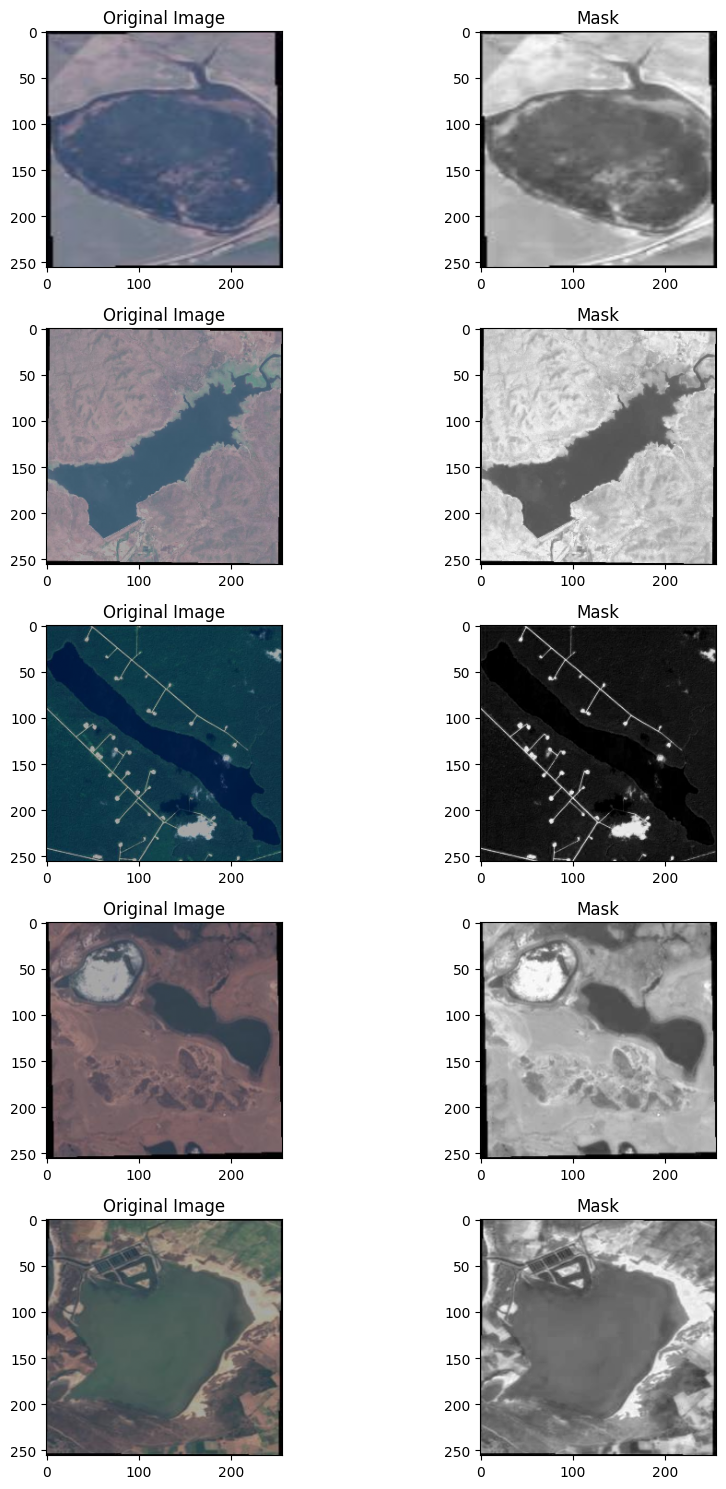

In [ ]:
# Plot some images and its masks
plt.figure(figsize=(10,15))
for i in range(1,11):
  plt.subplot(5,2,i)

  if i%2!=0:
    id = np.random.randint(len(images))
    plt.imshow(images[id], cmap=None)
    plt.title('Original Image')
  elif i%2==0:
    plt.imshow(masks[id].reshape(256,256), cmap='gray')
    plt.title('Mask')

plt.tight_layout()
plt.show()

**Displaying Sample Images from the Folder for Overview**

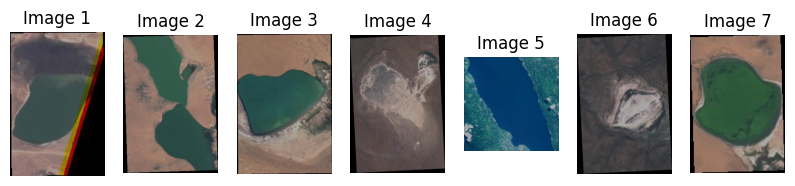

In [ ]:
# Display a few sample images to get an overview
num_samples = 7 # Show three samples

plt.figure(figsize=(10, 10))
for i in range(num_samples):
    # Load image
    img = cv2.imread(os.path.join(images_folder_path, image_files[i]))

    # Convert BGR image to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display image
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.show()


**Displaying Resized Grayscale Images**

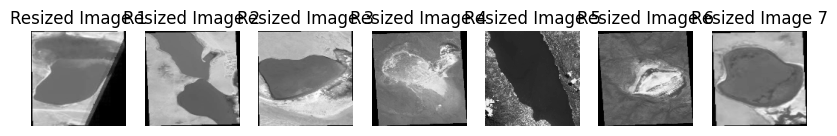

In [ ]:
# Display resized grayscale images (New Addition)
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    # Load and resize image
    img = cv2.imread(os.path.join(images_folder_path, image_files[i]))
    img_resized = cv2.resize(img, (128, 128))  # Resize to 128x128 for uniformity

    # Convert to grayscale for processing
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    # Display grayscale image
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title(f"Resized Image {i+1}")
    plt.axis('off')

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Generating and Visualizing Water Mask for Water Body Detection**

In [ ]:
def generate_water_mask(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert to RGB (OpenCV loads images in BGR format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert to HSV color space for better color segmentation
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the range for water color in HSV space (you can adjust these values)
    lower_blue = np.array([100, 50, 50])  # Lower bound of blue color
    upper_blue = np.array([140, 255, 255])  # Upper bound of blue color

    # Create a mask based on the blue color range
    water_mask = cv2.inRange(hsv_img, lower_blue, upper_blue)

    # Perform bitwise AND to extract water regions from the image
    result = cv2.bitwise_and(img_rgb, img_rgb, mask=water_mask)

    # Display the original image, mask, and the result
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    # Water Mask
    plt.subplot(1, 3, 2)
    plt.imshow(water_mask, cmap='gray')
    plt.title('Water Mask')
    plt.axis('off')

    # Resultant Image (Water Bodies Detected)
    plt.subplot(1, 3, 3)
    plt.imshow(result)
    plt.title('Detected Water Bodies')
    plt.axis('off')

    plt.show()

    return water_mask


**Adding Resizing to Water Mask Generation**

In [ ]:
def generate_resized_water_mask(image_path):
    # Read and resize the image
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (128, 128))  # Resize for uniform processing

    # Convert to HSV color space
    hsv_img = cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV)

    # Define the range for water color in HSV space
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([140, 255, 255])

    # Create a mask based on the blue color range
    water_mask = cv2.inRange(hsv_img, lower_blue, upper_blue)

    # Perform bitwise AND to extract water regions
    result = cv2.bitwise_and(img_resized, img_resized, mask=water_mask)

    # Display the original image, mask, and result
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.title('Resized Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(water_mask, cmap='gray')
    plt.title('Water Mask (Resized)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title('Detected Water Bodies (Resized)')
    plt.axis('off')

    plt.show()
    return water_mask


**Processing Randomly Selected Images for Water Body Detection**

Processing image: water_body_7150.jpg


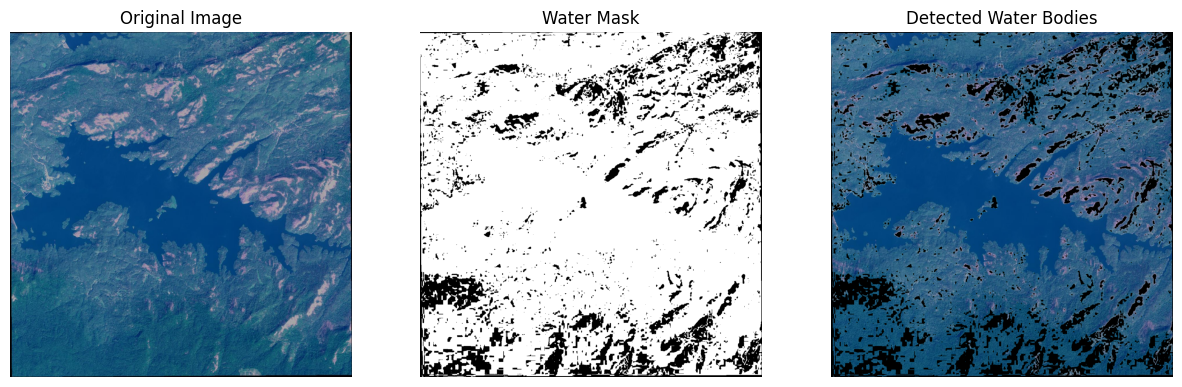

Processing image: water_body_1216.jpg


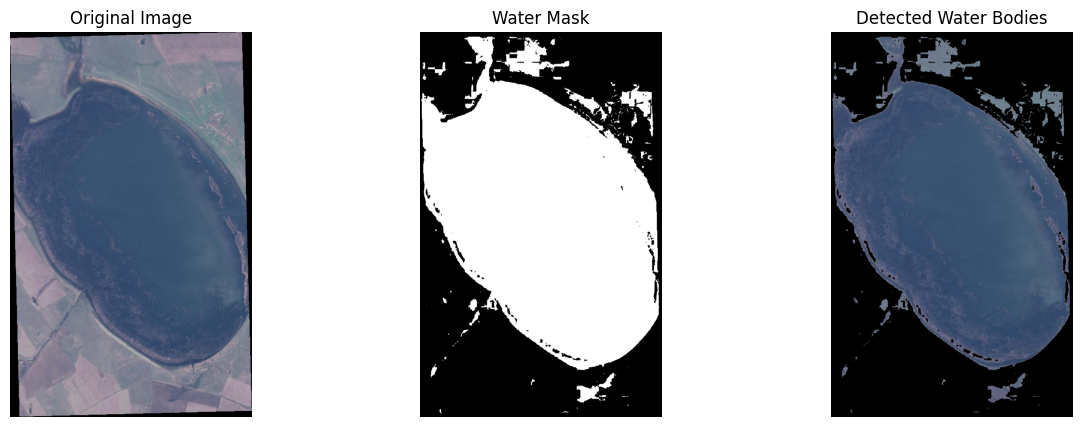

Processing image: water_body_1811.jpg


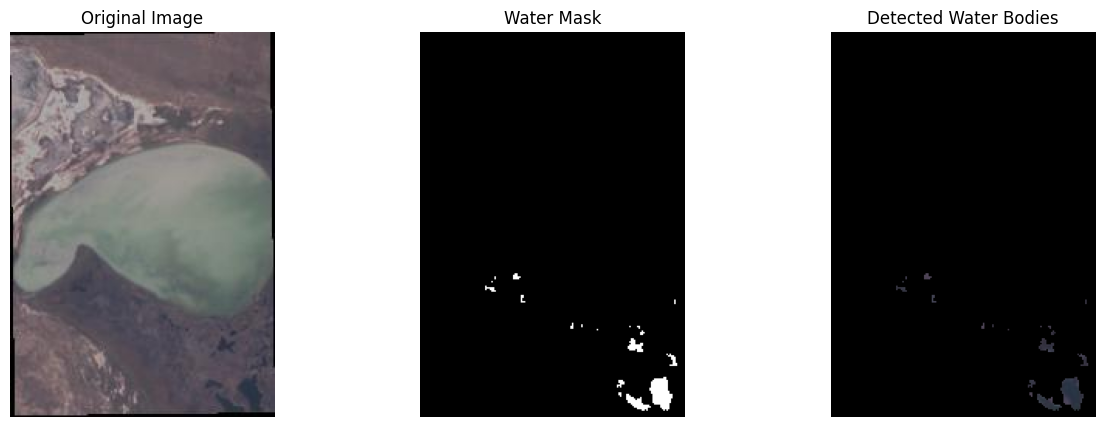

Processing image: water_body_7196.jpg


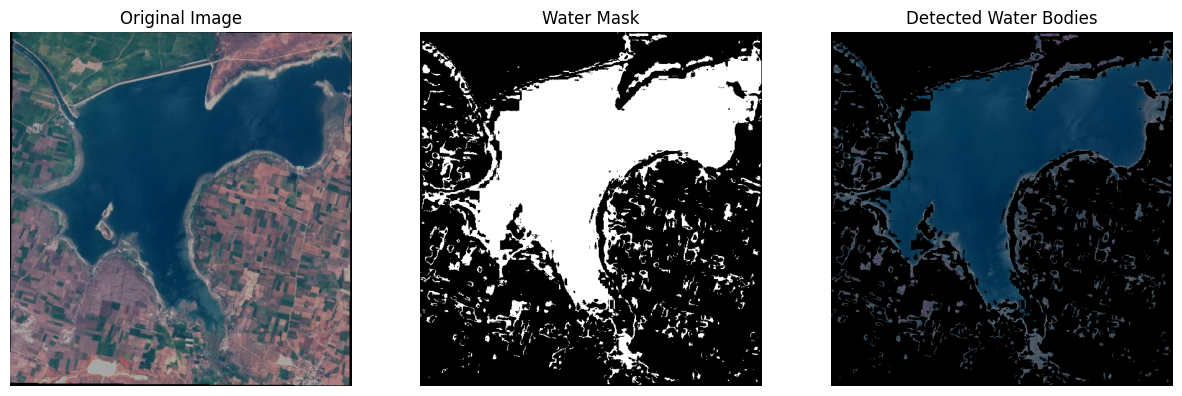

Processing image: water_body_1189.jpg


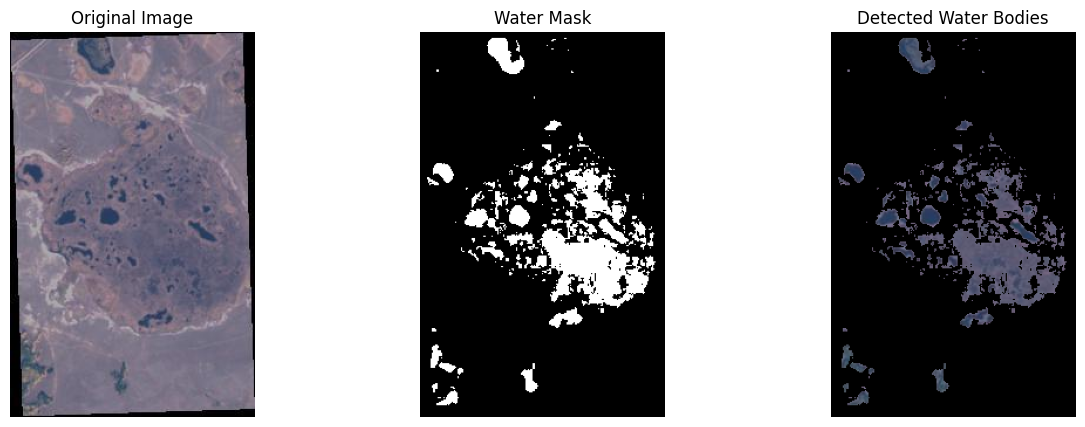

Processing image: water_body_2290.jpg


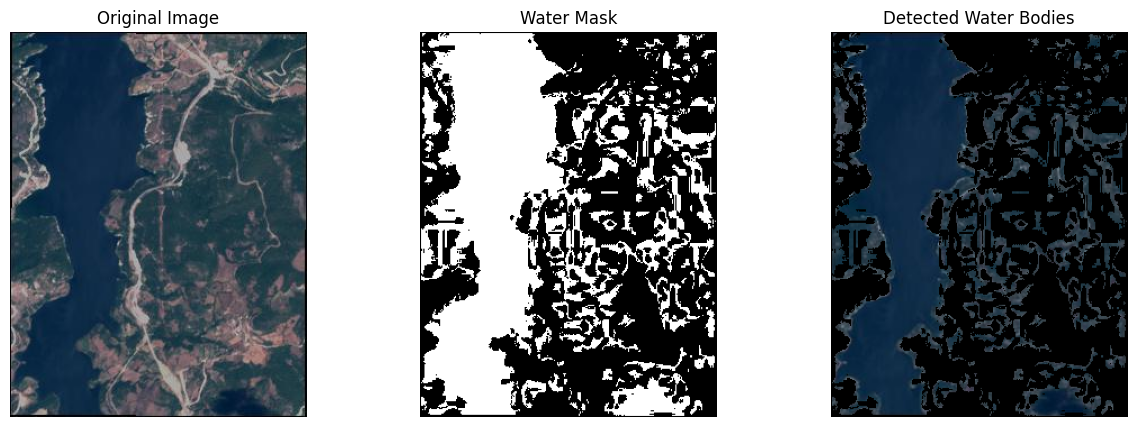

Processing image: water_body_2426.jpg


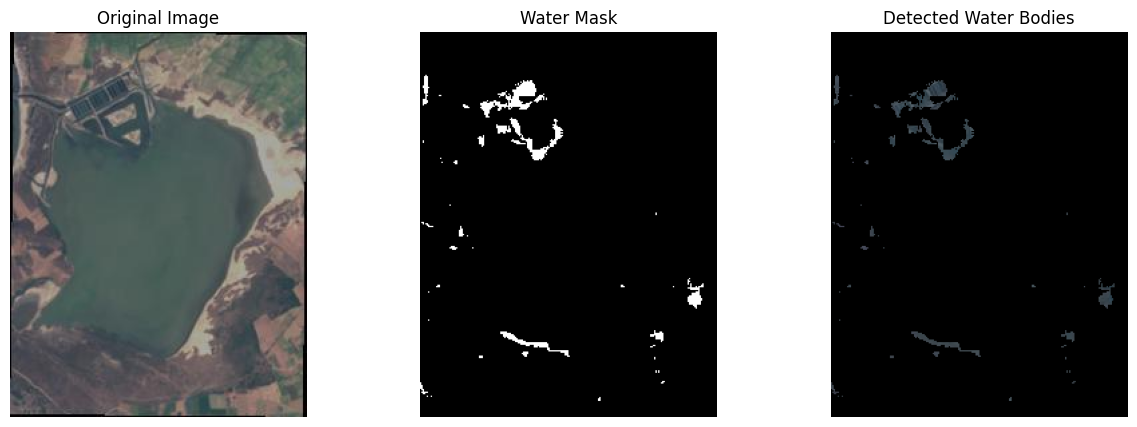

Processing image: water_body_1481.jpg


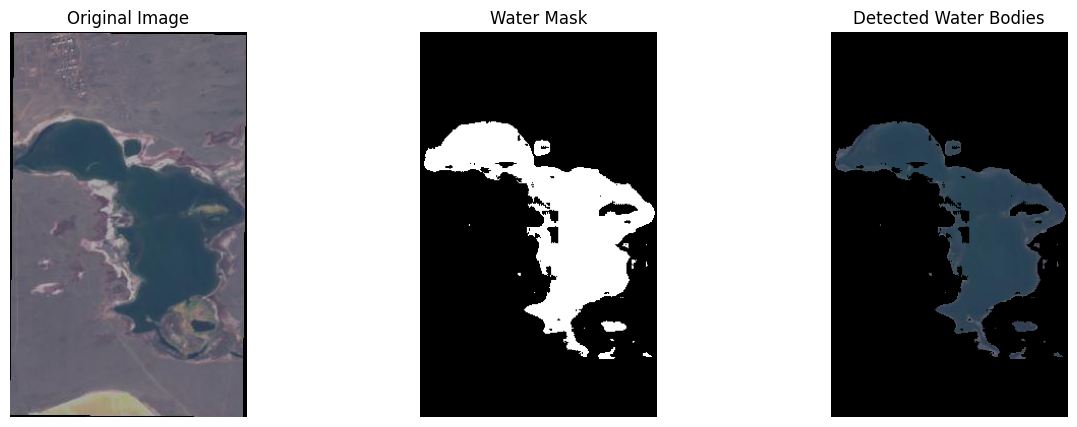

Processing image: water_body_7288.jpg


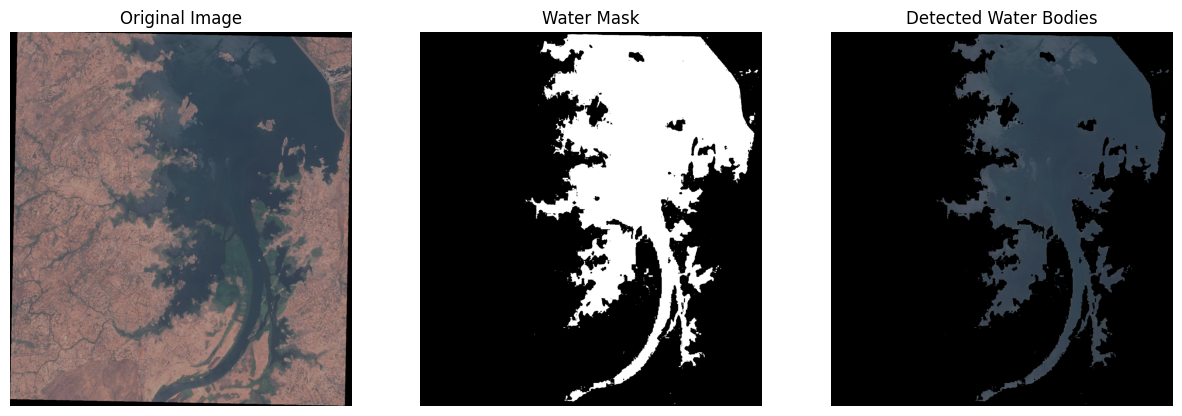

Processing image: water_body_2288.jpg


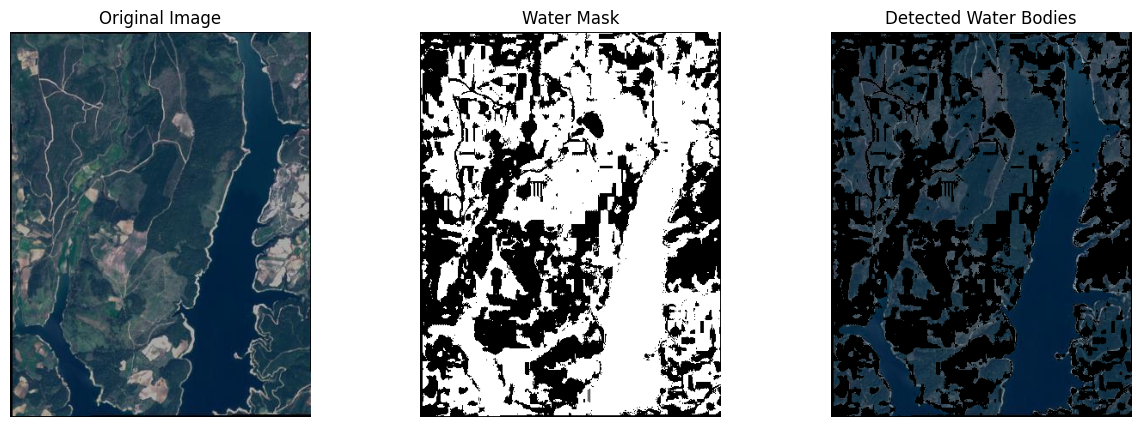

In [ ]:
import random

# Get list of image files in the folder
image_files = os.listdir(images_folder_path)

# Randomly select 10 images from the folder (make sure there are at least 10 images)
selected_images = random.sample(image_files, 10)

# Loop through each selected image and apply water detection
for image_file in selected_images:
    image_path = os.path.join(images_folder_path, image_file)
    print(f"Processing image: {image_file}")

    # Generate water mask and display the results
    generate_water_mask(image_path)


**Generating and Plotting Histogram of Water Body Mask Intensities**

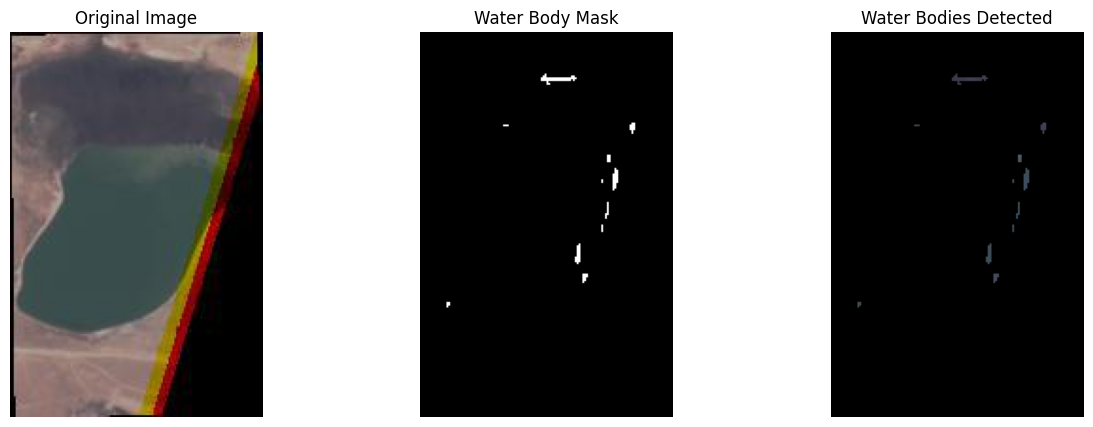

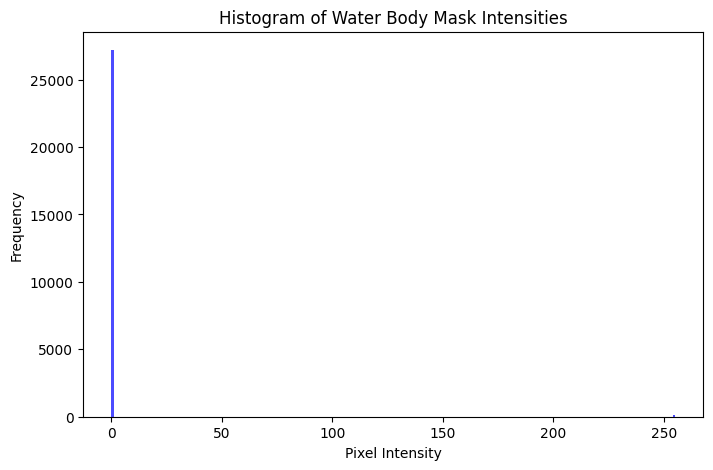

In [ ]:
def plot_histogram(mask):
    # Plot histogram of mask intensities
    plt.figure(figsize=(8, 5))
    plt.hist(mask.ravel(), bins=256, color='blue', alpha=0.7)
    plt.title("Histogram of Water Body Mask Intensities")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Generate and plot histogram for the detected mask
mask = detect_water_bodies(os.path.join(images_folder_path, image_files[0]))
plot_histogram(mask)


**Add Resizing in Random Image Processing**

Processing image: water_body_7150.jpg


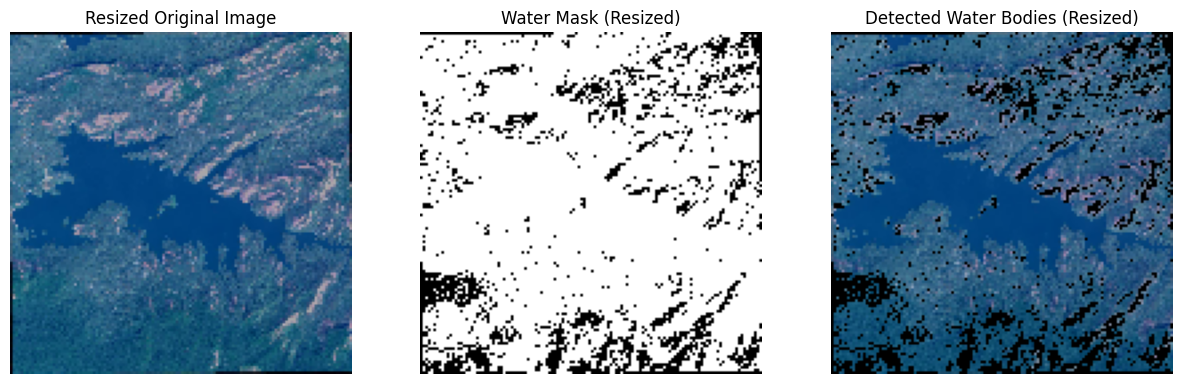

Processing image: water_body_1216.jpg


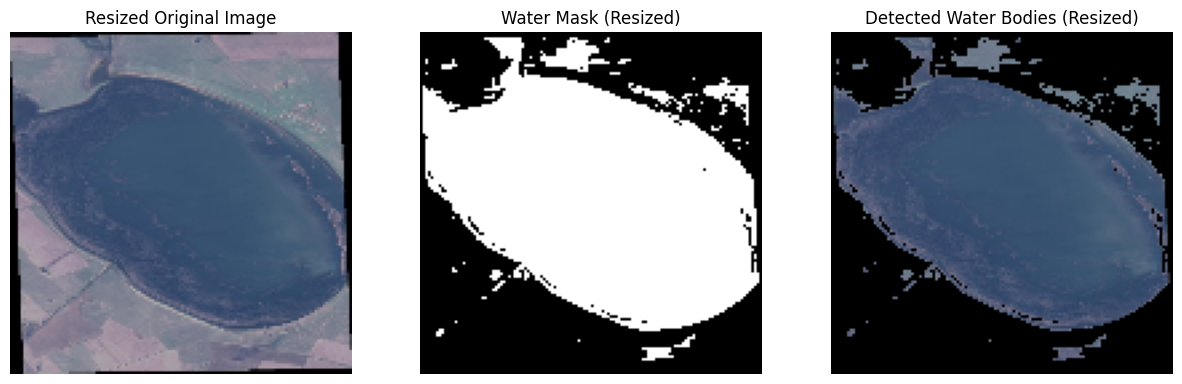

Processing image: water_body_1811.jpg


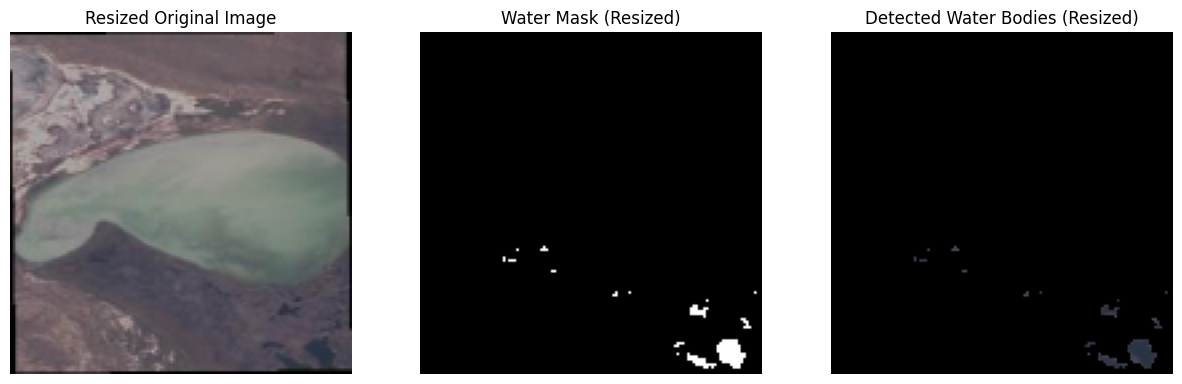

Processing image: water_body_7196.jpg


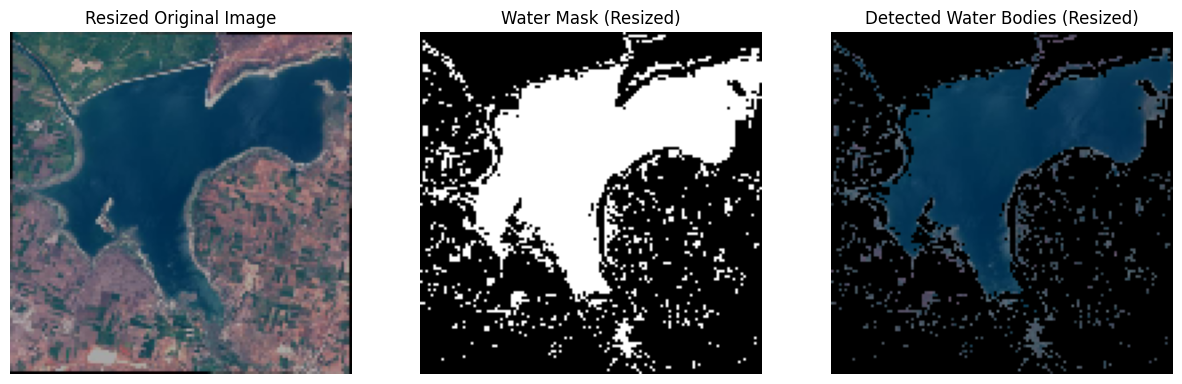

Processing image: water_body_1189.jpg


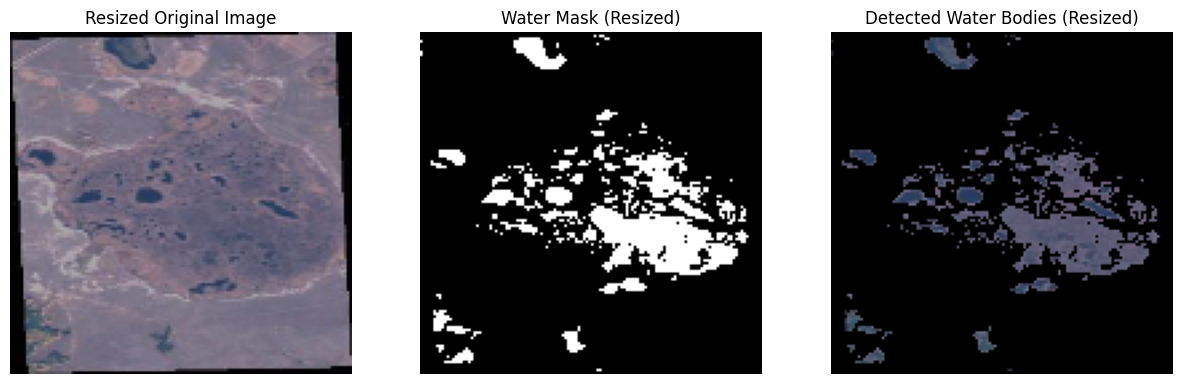

Processing image: water_body_2290.jpg


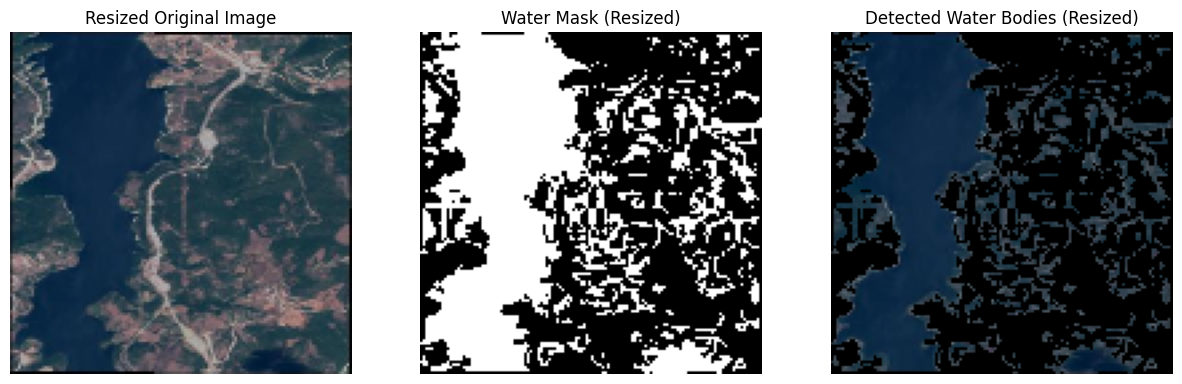

Processing image: water_body_2426.jpg


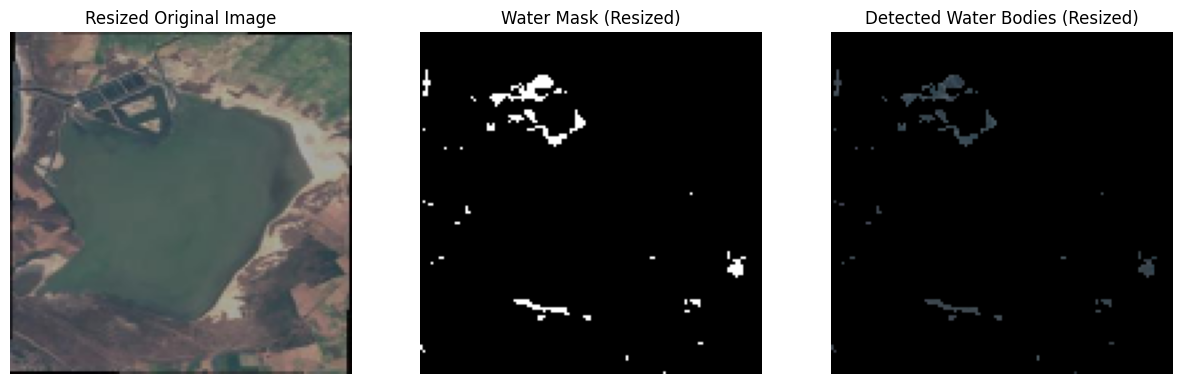

Processing image: water_body_1481.jpg


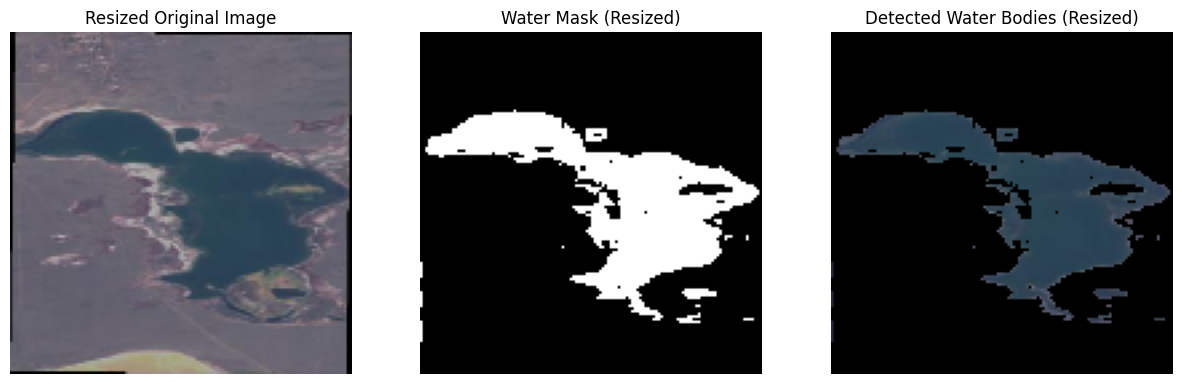

Processing image: water_body_7288.jpg


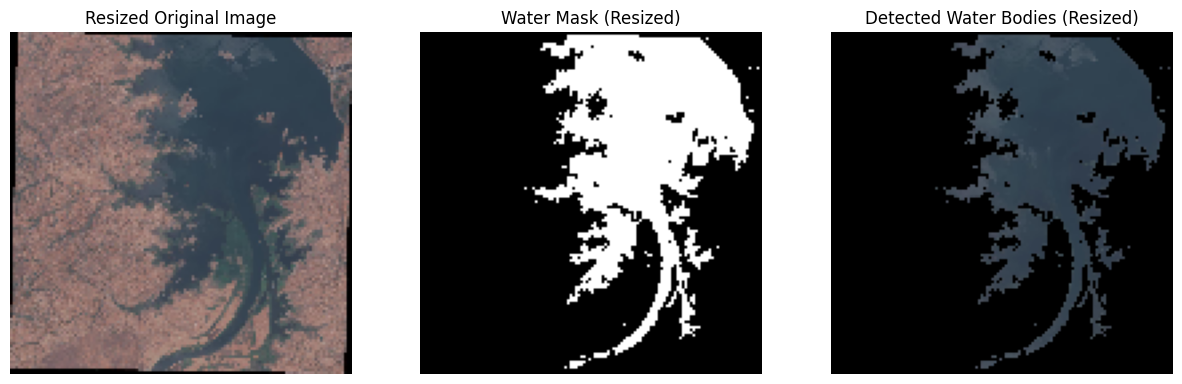

Processing image: water_body_2288.jpg


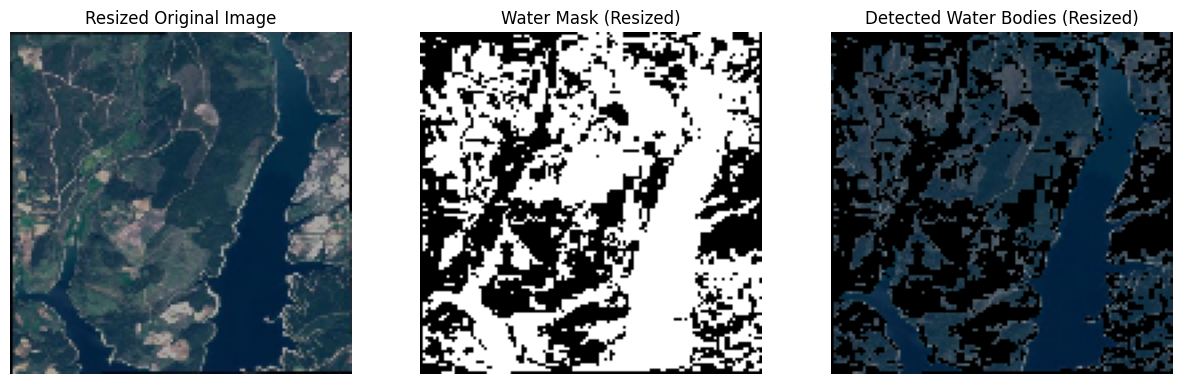

In [ ]:
# Loop through each selected image and apply resized water detection
for image_file in selected_images:
    image_path = os.path.join(images_folder_path, image_file)
    print(f"Processing image: {image_file}")

    # Generate water mask with resizing and display the results
    generate_resized_water_mask(image_path)


**Function to Compare Images**

In [ ]:
def compare_images(image1_path, image2_path):
    # Load both images
    image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale

    # Ensure images are the same size by resizing
    image1 = cv2.resize(image1, (128, 128))
    image2 = cv2.resize(image2, (128, 128))

    # Compute the absolute difference between the two images
    diff = cv2.absdiff(image1, image2)

    # Apply thresholding to highlight changes
    _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

    # Count the number of changed pixels
    changed_pixels = np.count_nonzero(thresh)

    # Display the difference and threshold
    plt.figure(figsize=(15, 5))

    # Display absolute difference
    plt.subplot(1, 2, 1)
    plt.imshow(diff, cmap='gray')
    plt.title('Absolute Difference')
    plt.axis('off')

    # Display thresholded difference
    plt.subplot(1, 2, 2)
    plt.imshow(thresh, cmap='gray')
    plt.title('Thresholded Difference')
    plt.axis('off')

    plt.show()

    return changed_pixels


**Example**

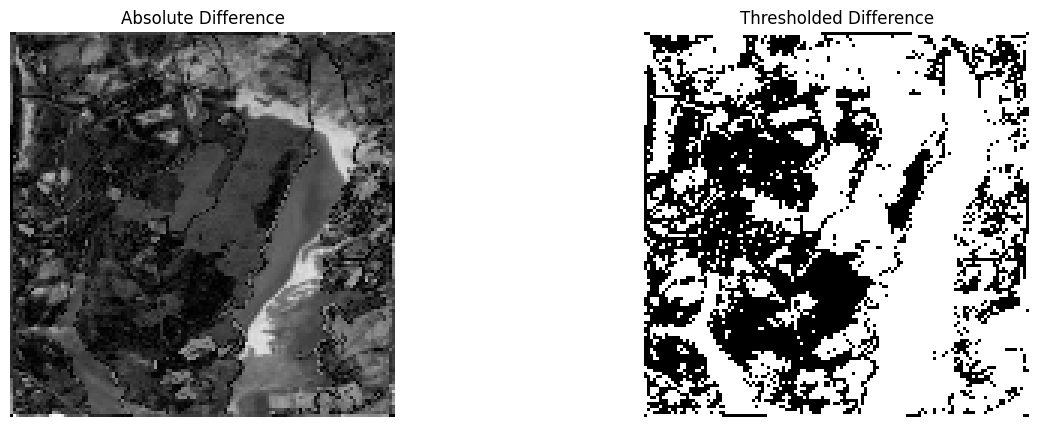

Number of changed pixels between the images: 9968


In [ ]:
# Example usage of comparing two images
image1_path = '/content/drive/My Drive/Images/water_body_2426.jpg'
image2_path = '/content/drive/My Drive/Images/water_body_2288.jpg'

# Calculate the number of changed pixels
changed_pixels = compare_images(image1_path, image2_path)
print(f"Number of changed pixels between the images: {changed_pixels}")


In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the images folder
images_folder_path = '/content/drive/My Drive/Images'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading and Preprocessing Images for Water Body Detection, and Splitting Dataset**

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the images folder
images_folder_path = '/content/drive/My Drive/Images'

# Function to load and preprocess images
def load_and_preprocess_images(image_folder_path):
    image_files = os.listdir(image_folder_path)
    images = []
    labels = []

    for image_file in image_files:
        image_path = os.path.join(image_folder_path, image_file)

        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Read the image
            img = cv2.imread(image_path)
            if img is None:
                print(f"Skipping invalid image: {image_file}")
                continue  # Skip invalid images

            # Resize image to fixed size (e.g., 128x128)
            img_resized = cv2.resize(img, (128, 128))

            # Normalize pixel values (0 to 1)
            img_normalized = img_resized.astype("float32") / 255.0

            # Add the image to the list
            images.append(img_normalized)

            # Assuming a labeled dataset with proper annotations (replace this with actual labels)
            # Example: Label file or other metadata
            label = 1 if 'water' in image_file.lower() else 0  # Adjust this for actual labels
            labels.append(label)

    # Convert to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Load and preprocess images
images, labels = load_and_preprocess_images(images_folder_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Training images: {len(X_train)}, Testing images: {len(X_test)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training images: 1248, Testing images: 312


**Building and Summarizing the CNN Model for Water Body Detection**

Training data shape: (1248, 128, 128, 3)
Validation data shape: (312, 128, 128, 3)
Class distribution: [   0 1560]


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 126, 126, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 63, 63, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 63, 63, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 61, 61, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 28, 28, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │         200,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,801 (807.82 KB)

 Trainable params: 206,801 (807.82 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1: LearningRateScheduler setting learning rate to 0.0005.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9062 - loss: 1.5010 - val_accuracy: 1.0000 - val_loss: 1.3152 - learning_rate: 5.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.00045000000000000004.
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 1.0000 - loss: 1.1367 - val_accuracy: 1.0000 - val_loss: 1.1464 - learning_rate: 4.5000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.00040500000000000003.
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 1.0000 - loss: 1.0268 - val_accuracy: 1.0000 - val_loss: 1.0447 - learning_rate: 4.0500e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0003645000000000001.
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 1.0000 - loss: 0.9965 - val_accuracy: 1.0000 - val_loss: 1.0264 - learning_rate: 3.6450e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.00032805000000000003.
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step - accuracy: 1.0000 - loss: 0.

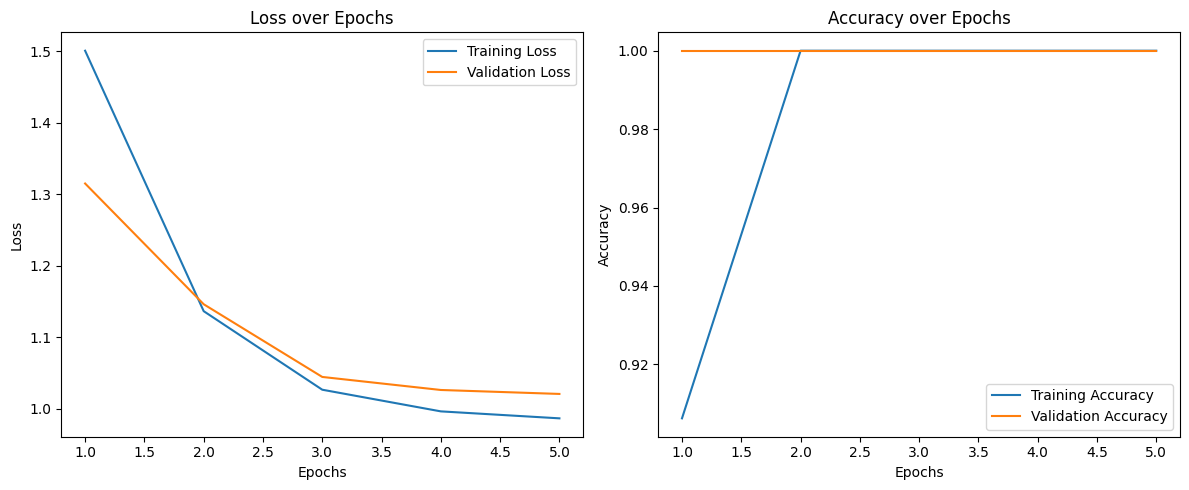

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Paths
images_folder_path = '/content/drive/My Drive/Images'

# Constants
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 5
STEPS_PER_EPOCH = 1  # Adjust steps_per_epoch for smaller batch simulation
VALIDATION_STEPS = 1

# Load and preprocess images
image_files = [os.path.join(images_folder_path, f) for f in os.listdir(images_folder_path) if f.endswith(('.jpg', '.png'))]
labels = [1 if "water_body" in os.path.basename(f) else 0 for f in image_files]  # Binary classification: water_body=1

# Preprocess images
images = [img_to_array(load_img(img, target_size=IMG_SIZE)) / 255.0 for img in image_files]
images = np.array(images)
labels = np.array(labels)

# Split data
X_train, X_val, y_train, y_val = train_test_split(
    images, labels, test_size=0.2, random_state=42, shuffle=True
)

# Check data shape and balance
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Class distribution: {np.bincount(labels)}")

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: weight for i, weight in enumerate(class_weights)}

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_data = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)

# Validation data generator (no augmentation)
val_datagen = ImageDataGenerator()
val_data = val_datagen.flow(X_val, y_val, batch_size=BATCH_SIZE)

# Build the CNN model
def build_cnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the CNN model
input_shape = (IMG_SIZE[0], IMG_SIZE[1], 3)
cnn_model = build_cnn_model(input_shape)

# Summary of the model
cnn_model.summary()

# Define learning rate scheduler
lr_scheduler = LearningRateScheduler(
    lambda epoch: 0.0005 * (0.9 ** epoch), verbose=1
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Train the model with smaller steps per epoch
history = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,  # Smaller training steps
    validation_steps=VALIDATION_STEPS,  # Smaller validation steps
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

# Plot accuracy and loss
def plot_metrics(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    # Plot loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics(history)
